# Загружаем все необходимые библиотеки

---



In [105]:
!pip install yfinance

In [106]:
pip install tinkoff-investments

Note: you may need to restart the kernel to use updated packages.


# Загружаем все необходимые библиотеки
___

In [107]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

from datetime import timedelta

from tinkoff.invest import CandleInterval, Client
from tinkoff.invest.schemas import CandleSource
from tinkoff.invest.utils import now

# Определяем границы загружаемого датасета с Yahoo Finance

---



In [108]:
TOKEN = 't.IPS3wd-jnQJDycNBPqOGeAmVKG9hK9AdsN_4XSqLQ9EMrtFHfrs2fMnw18rWOeOktaYceov5Z2ju8PTDbvGDbg'

In [109]:
with Client(TOKEN) as client:
    for candle in client.get_all_candles(
        instrument_id="BBG004730N88",
        from_=now() - timedelta(days=20),
        interval=CandleInterval.CANDLE_INTERVAL_DAY,
        candle_source_type=CandleSource.CANDLE_SOURCE_UNSPECIFIED,
    ):
        print(candle)

HistoricCandle(open=Quotation(units=306, nano=760000000), high=Quotation(units=307, nano=140000000), low=Quotation(units=304, nano=620000000), close=Quotation(units=306, nano=480000000), volume=2068218, time=datetime.datetime(2024, 4, 10, 0, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle_source=<CandleSource.CANDLE_SOURCE_EXCHANGE: 1>)
HistoricCandle(open=Quotation(units=306, nano=700000000), high=Quotation(units=308, nano=0), low=Quotation(units=305, nano=700000000), close=Quotation(units=306, nano=950000000), volume=2051700, time=datetime.datetime(2024, 4, 11, 0, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle_source=<CandleSource.CANDLE_SOURCE_EXCHANGE: 1>)
HistoricCandle(open=Quotation(units=307, nano=400000000), high=Quotation(units=307, nano=870000000), low=Quotation(units=306, nano=300000000), close=Quotation(units=307, nano=100000000), volume=1602530, time=datetime.datetime(2024, 4, 12, 0, 0, tzinfo=datetime.timezone.utc), is_complete=True, candle_source=

In [110]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Определяем функцию загрузки данных

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [111]:
data = load_data('SBER.ME')
df=data
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
2610,2022-05-18,128.199997,131.300003,125.000000,125.120003,125.120003,55565940
2611,2022-05-19,125.309998,126.860001,123.209999,125.599998,125.599998,34246550
2612,2022-05-20,125.599998,125.599998,125.599998,125.599998,125.599998,0
2613,2022-05-23,125.599998,125.599998,125.599998,125.599998,125.599998,0
2614,2022-05-24,125.599998,125.599998,125.599998,125.599998,125.599998,0


In [112]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,79.000000,79.370003,75.849998,75.989998,293803296
1,76.940002,77.760002,75.099998,76.400002,272599360
2,75.000000,77.440002,74.419998,76.800003,335403040
3,76.730003,77.290001,73.820000,73.820000,177337888
4,75.400002,78.750000,73.750000,78.269997,319155936


# Визуализируем цену закрытия
___

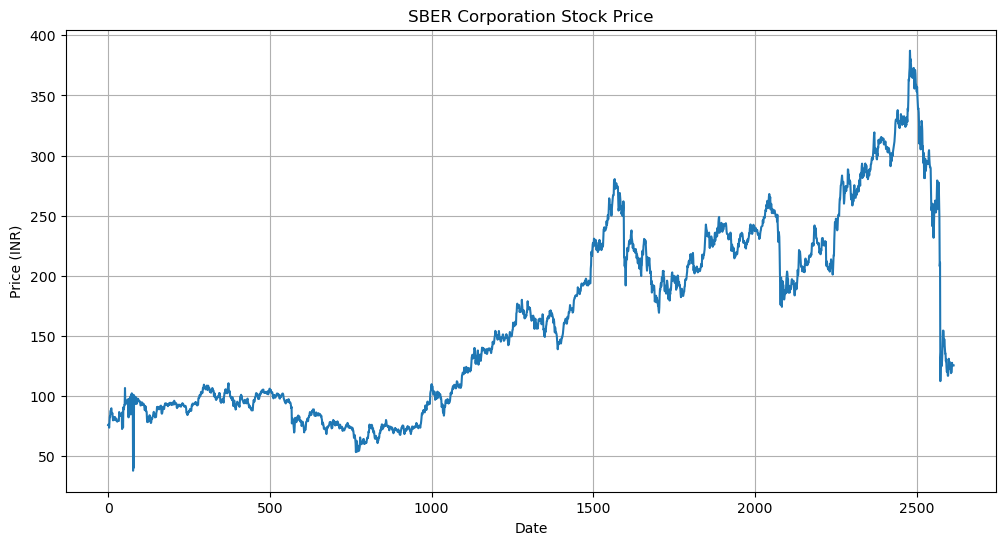

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("SBER Corporation Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [114]:
df

,Open,High,Low,Close,Volume
0,79.000000,79.370003,75.849998,75.989998,293803296
1,76.940002,77.760002,75.099998,76.400002,272599360
2,75.000000,77.440002,74.419998,76.800003,335403040
3,76.730003,77.290001,73.820000,73.820000,177337888
4,75.400002,78.750000,73.750000,78.269997,319155936
...,...,...,...,...,...
2610,128.199997,131.300003,125.000000,125.120003,55565940
2611,125.309998,126.860001,123.209999,125.599998,34246550
2612,125.599998,125.599998,125.599998,125.599998,0
2613,125.599998,125.599998,125.599998,125.599998,0


# Рисуем 100 дневную скользящую среднюю

---



In [115]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2610    221.975001
2611    220.052201
2612    218.256200
2613    216.345800
2614    214.445200
Name: Close, Length: 2615, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

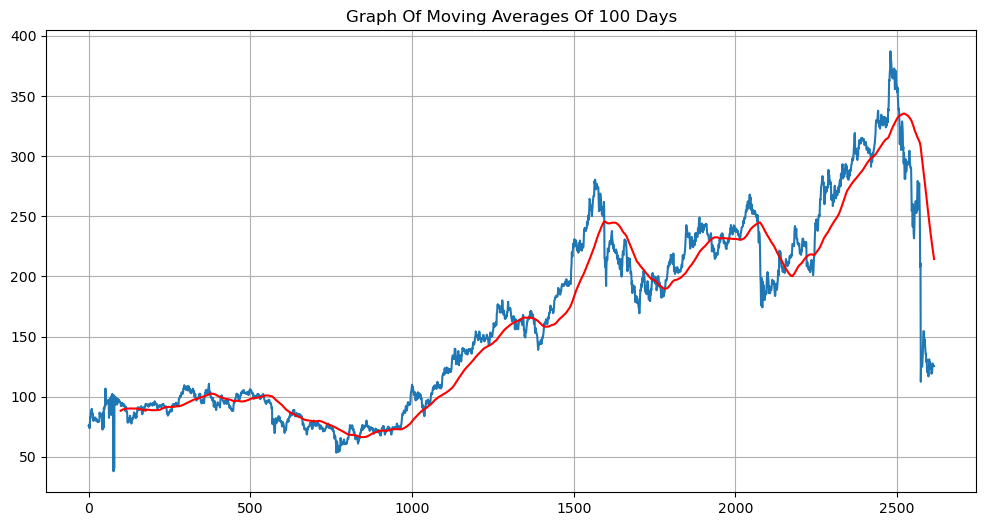

In [116]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Рисуем 200 дневную скользящую среднюю вместе со 100 дневной скользящей средней

---



In [117]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2610    278.030051
2611    277.137401
2612    276.251401
2613    275.360051
2614    274.457351
Name: Close, Length: 2615, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

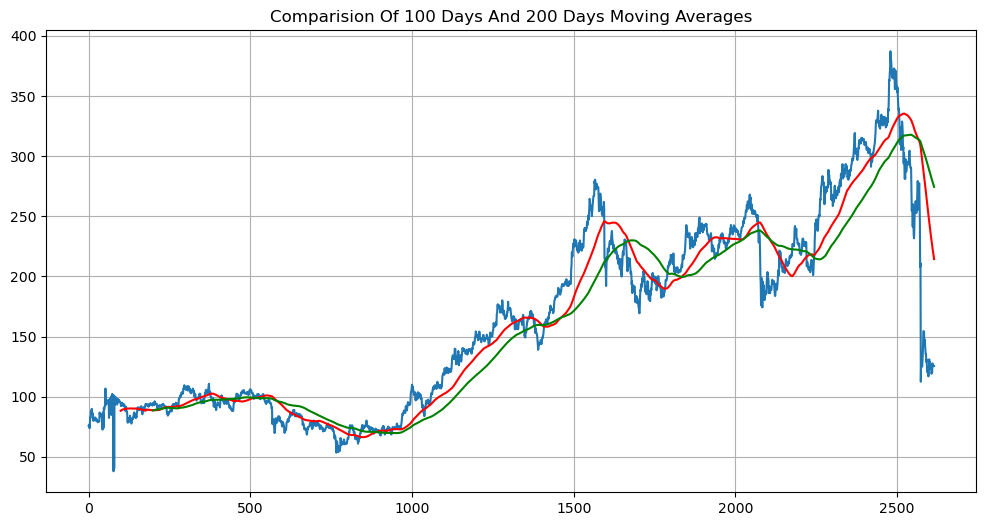

In [118]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [119]:
df.shape

(2615, 5)

# Разделение датасета на данные для обучения и теста модели
___

In [120]:
# Разделяем данные в соотношении 70% на 30%

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1830, 7)
(785, 7)


In [121]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-21,79.000000,79.370003,75.849998,75.989998,50.189579,293803296
1,2011-11-22,76.940002,77.760002,75.099998,76.400002,50.460369,272599360
2,2011-11-23,75.000000,77.440002,74.419998,76.800003,50.724567,335403040
3,2011-11-24,76.730003,77.290001,73.820000,73.820000,48.756340,177337888
4,2011-11-25,75.400002,78.750000,73.750000,78.269997,51.695454,319155936


In [122]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1830,2019-03-15,204.199997,204.949997,203.720001,204.190002,165.123428,22255810
1831,2019-03-18,204.250000,206.139999,204.110001,205.740005,166.376862,37157080
1832,2019-03-19,206.399994,208.309998,205.929993,207.369995,167.694992,43305540
1833,2019-03-20,207.600006,209.580002,206.399994,209.080002,169.077835,49905900
1834,2019-03-21,210.250000,212.289993,209.770004,210.050003,169.862259,62875460


# Применяем MinMaxScaler для нормализации данных

---



In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [124]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [125]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.15659917],
       [0.15829028],
       [0.15994013],
       ...,
       [0.68718938],
       [0.69065404],
       [0.68409592]])

In [126]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [127]:
x_train.shape

(1730, 100, 1)

# ML Model (LSTM)

---



In [129]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [131]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [132]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100, 100)          40800     
                                                                 
 dropout_9 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_12 (LSTM)              (None, 100, 60)           38640     
                                                                 
 dropout_10 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_11 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_14 (LSTM)              (None, 120)              

# Обучаем модель

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
55/55 [==============================] - 23s 360ms/step - loss: 0.1291 - mean_absolute_error: 0.1291
Epoch 2/10
55/55 [==============================] - 20s 363ms/step - loss: 0.0588 - mean_absolute_error: 0.0588
Epoch 3/10
55/55 [==============================] - 22s 404ms/step - loss: 0.0554 - mean_absolute_error: 0.0554
Epoch 4/10
55/55 [==============================] - 21s 387ms/step - loss: 0.0535 - mean_absolute_error: 0.0535
Epoch 5/10
55/55 [==============================] - 22s 393ms/step - loss: 0.0526 - mean_absolute_error: 0.0526
Epoch 6/10
55/55 [==============================] - 22s 395ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 7/10
55/55 [==============================] - 22s 391ms/step - loss: 0.0468 - mean_absolute_error: 0.0468
Epoch 8/10
55/55 [==============================] - 22s 392ms/step - loss: 0.0466 - mean_absolute_error: 0.0466
Epoch 9/10
55/55 [==============================] - 22s 395ms/step - loss: 0.0464 - mean_absolute_error:

In [59]:
model.save('keras_model.keras')

In [85]:
test_close.shape

(785, 1)

In [86]:
past_100_days = pd.DataFrame(train_close[-100:])

In [87]:
test_df = pd.DataFrame(test_close)

**Определение окончательного набора данных для тестирования путем включения последних 100 столбцов набора обучающих данных, чтобы получить прогноз из 1-го столбца набора тестовых данных.**

---


In [88]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [89]:
final_df.head()

,0
0,191.000000
1,183.800003
2,180.699997
3,182.009995
4,188.009995


In [90]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.28576628],
       [0.25955588],
       [0.24827082],
       [0.25303965],
       [0.27488166],
       [0.27014927],
       [0.24382961],
       [0.26607205],
       [0.26312339],
       [0.28139789],
       [0.27728429],
       [0.29159084],
       [0.31052057],
       [0.3254459 ],
       [0.32904986],
       [0.30305787],
       [0.30695305],
       [0.30600653],
       [0.31561701],
       [0.31907532],
       [0.31583542],
       [0.31121224],
       [0.29745178],
       [0.30942845],
       [0.31634507],
       [0.3087004 ],
       [0.27666544],
       [0.28587548],
       [0.282854  ],
       [0.30309425],
       [0.29668728],
       [0.3196214 ],
       [0.31488896],
       [0.30396795],
       [0.29009829],
       [0.300364  ],
       [0.28867856],
       [0.29148163],
       [0.28376408],
       [0.27910446],
       [0.26366942],
       [0.25409538],
       [0.26974883],
       [0.27793958],
       [0.27957772],
       [0.27044044],
       [0.26137605],
       [0.257

In [91]:
input_data.shape

(885, 1)

# Тестирование модели

---



In [92]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [93]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(785, 100, 1)
(785,)


## Формируем набор прогнозных значения и накладываем их на график с истинными значениями из тестовой выборки

---



In [94]:
# Making predictions

y_pred = model.predict(x_test)

25/25 [==============================] - 1s 22ms/step


In [95]:
y_pred.shape

(785, 1)

In [96]:
y_test

array([0.3337823 , 0.33942483, 0.34535854, 0.35158354, 0.35511467,
       0.34655986, 0.36661814, 0.38289038, 0.37331634, 0.37044044,
       0.37284308, 0.38310885, 0.38281762, 0.39035308, 0.39781578,
       0.41667274, 0.43421912, 0.45718963, 0.47393519, 0.46592646,
       0.45828174, 0.45613396, 0.43953404, 0.44339278, 0.43789584,
       0.43720423, 0.44743356, 0.44838002, 0.44958134, 0.41973061,
       0.40291222, 0.42337094, 0.41015651, 0.42446305, 0.43691299,
       0.43793228, 0.43316345, 0.42773933, 0.41681833, 0.4066982 ,
       0.41700036, 0.42540952, 0.42267927, 0.41659992, 0.41317799,
       0.43760466, 0.4490717 , 0.42519111, 0.44393881, 0.44958134,
       0.43935201, 0.44011645, 0.43775025, 0.43953404, 0.46396065,
       0.44958134, 0.45915544, 0.48212594, 0.49428465, 0.49690569,
       0.4491809 , 0.46592646, 0.45977429, 0.45613396, 0.47069529,
       0.46559879, 0.47906808, 0.45693483, 0.46082996, 0.45212956,
       0.46629046, 0.46596285, 0.45886421, 0.47499086, 0.46851

In [97]:
y_pred

array([[0.34452647],
       [0.3440752 ],
       [0.3448682 ],
       [0.34719837],
       [0.3510539 ],
       [0.3556195 ],
       [0.35793138],
       [0.36313206],
       [0.37154782],
       [0.37771285],
       [0.38147354],
       [0.38384396],
       [0.38701513],
       [0.3895653 ],
       [0.39296156],
       [0.3975191 ],
       [0.40564555],
       [0.4173501 ],
       [0.4333092 ],
       [0.45164943],
       [0.4658658 ],
       [0.47405845],
       [0.47721845],
       [0.47339243],
       [0.4677899 ],
       [0.46074745],
       [0.4542521 ],
       [0.45147243],
       [0.4511092 ],
       [0.45253044],
       [0.4484021 ],
       [0.43967962],
       [0.43487766],
       [0.4292801 ],
       [0.4278662 ],
       [0.4310658 ],
       [0.43606707],
       [0.44026923],
       [0.44238538],
       [0.44083226],
       [0.4357354 ],
       [0.43205395],
       [0.43103573],
       [0.43076068],
       [0.42985836],
       [0.42833775],
       [0.432045  ],
       [0.439

In [98]:
scaler.scale_

array([0.00364033])

In [99]:
scale_factor = 1/0.00364033
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

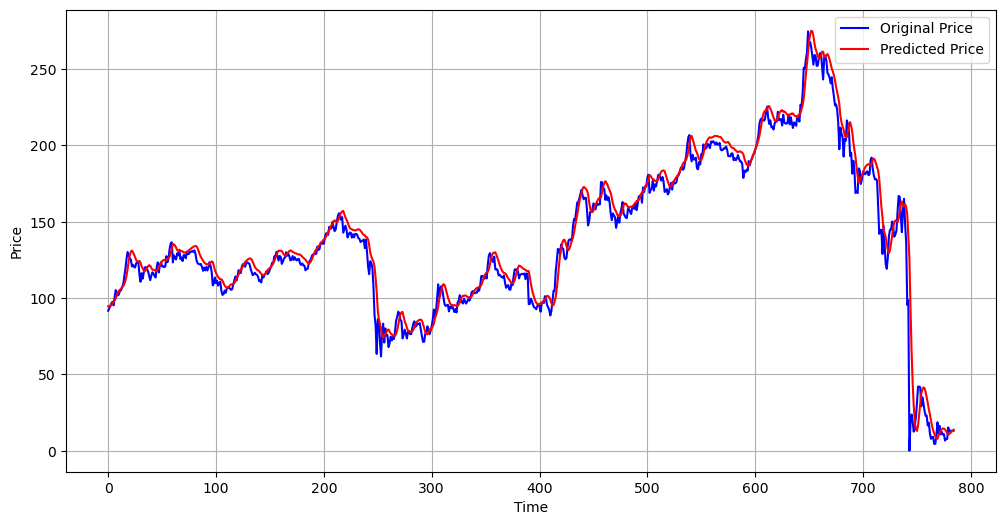

In [100]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Оценка точности модели

Расчет средней абсолютной ошибки

In [101]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.38%


Расчет оценки R2

In [102]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9652731189060938


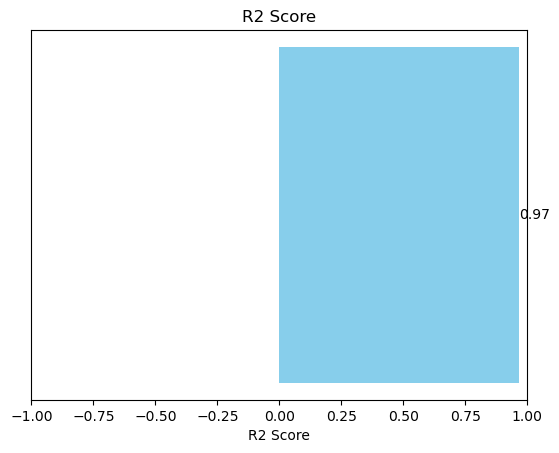

In [103]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

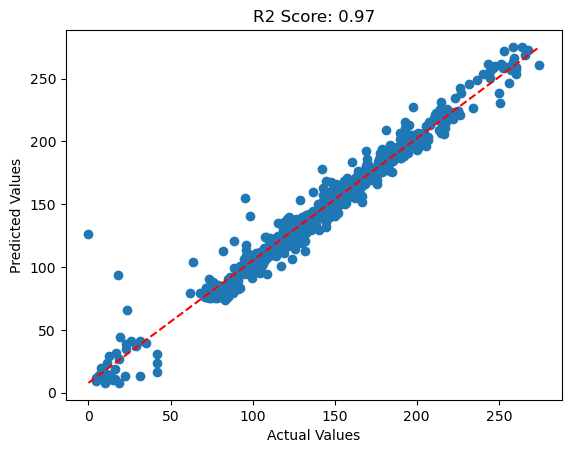

In [104]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()